In [ ]:
!pip install census 
!pip install us

#Data Collection

Use Cencus API to get datasets of socioeconomic data per county in MA and NC:

In [ ]:
from census import Census
from us import states

c = Census("995592115d76c8ecf954bb9000fc2e75f5bf796e")

census_2019 = c.acs5.state_county(fields = ('NAME', 'B02001_001E', 'B02001_002E', 'B02001_003E', 
                                            'B17001_001E', 'B23006_007E', 'B23006_002E', 'B23006_009E', 
                                            'B23006_014E','B23006_028E', 'B23006_023E', 'C27001A_001E', 
                                            'C27001A_007E', 'C27001B_001E', 'C27001B_007E', 'B23006_001E', 'B17001_002E'),
                                      state_fips = "*",
                                      county_fips = "*",
                                      year = 2019)


In [ ]:
import pandas as pd # library for data analysis

census_df = pd.DataFrame(census_2019)

# Show the dataframe
census_df.head(2)

In [ ]:
census_df.shape[0]

3220

# Data Cleaning and Feature Engineering for Census data

In [ ]:
census_df[['County', 'State']] = census_df['NAME'].str.split(', ',expand=True)

census_df = census_df.rename(columns={"B02001_001E": "total_pop", "B02001_002E": "only_white", "B02001_003E": "only_black", "B17001_001E": "poverty_total",
                                      "B17001_002E": "in_poverty", "B23006_001E": "employment_by_education_total","B23006_002E": "no_hs", "B23006_007E": "no_hs_unemployed", 
                                      "B23006_009E": "hs_diploma", "B23006_014E": "hs_unemployed", 
                                      "B23006_023E": "bach_or_higher", "B23006_028E": "bach_unemployed", "C27001A_001E": "total_white_hc", 
                                      "C27001A_007E": "white_uncovered", "C27001B_001E": "total_black_hc", "C27001B_007E": "black_uncovered"})
# employement by education: 25-64 years old
census_df.head(2)


,NAME,total_pop,only_white,only_black,poverty_total,no_hs_unemployed,no_hs,hs_diploma,hs_unemployed,bach_unemployed,...,total_white_hc,white_uncovered,total_black_hc,black_uncovered,employment_by_education_total,in_poverty,state,county,County,State
0,"Fayette County, Illinois",21565.0,20245.0,1007.0,19855.0,67.0,1678.0,4165.0,186.0,3.0,...,19562.0,1357.0,88.0,0.0,11245.0,3421.0,17,051,Fayette County,Illinois
1,"Logan County, Illinois",29003.0,25667.0,2003.0,24979.0,44.0,1771.0,4844.0,221.0,21.0,...,24102.0,837.0,465.0,51.0,15149.0,2323.0,17,107,Logan County,Illinois


In [ ]:
# feature engineering to get proportions in order to compare across counties with different population sizes
census_df["only_white_prop"] = census_df["only_white"] / census_df["total_pop"]
census_df["only_black_prop"] = census_df["only_black"] / census_df["total_pop"]
census_df["no_hs_prop"] = census_df["no_hs"] / census_df["employment_by_education_total"]
census_df["hs_prop"] = census_df["hs_diploma"] / census_df["employment_by_education_total"]
census_df["bach_prop"] = census_df["bach_or_higher"] / census_df["employment_by_education_total"]
census_df["total_unemployed"] = (census_df["no_hs_unemployed"] + census_df["hs_unemployed"] + census_df["bach_unemployed"]) / census_df["employment_by_education_total"]
census_df["white_uncovered_prop"] = census_df["white_uncovered"] / census_df["total_white_hc"]
census_df["black_uncovered_prop"] = census_df["black_uncovered"] / census_df["total_black_hc"]
census_df["poverty_prop"] = census_df["in_poverty"] / census_df["poverty_total"]

census_df["County"] = census_df["County"].str.replace(' County', '')
census_df["County"] = census_df["County"].str.replace(' Borough', '')
census_df["County"] = census_df["County"].str.replace(' Parish', '')
census_df["County"] = census_df["County"].str.replace(' city', '')

census_df.head(2)

,NAME,total_pop,only_white,only_black,poverty_total,no_hs_unemployed,no_hs,hs_diploma,hs_unemployed,bach_unemployed,...,State,only_white_prop,only_black_prop,no_hs_prop,hs_prop,bach_prop,total_unemployed,white_uncovered_prop,black_uncovered_prop,poverty_prop
0,"Fayette County, Illinois",21565.0,20245.0,1007.0,19855.0,67.0,1678.0,4165.0,186.0,3.0,...,Illinois,0.938790,0.046696,0.149222,0.370387,0.110538,0.022766,0.069369,0.000000,0.172299
1,"Logan County, Illinois",29003.0,25667.0,2003.0,24979.0,44.0,1771.0,4844.0,221.0,21.0,...,Illinois,0.884977,0.069062,0.116905,0.319757,0.195590,0.018879,0.034727,0.109677,0.092998


In [ ]:
census_df.to_excel("census.xlsx")

Use BeautifulSoup to web scrape Wikipedia tables for the list of counties with superfund sites 

In [ ]:
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents

states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", 
          "Washington,_D.C.", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", 
          "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", 
          "Montana", "Nebraska", "Nevada", "New_Hampshire", "New_Jersey", "New_Mexico", "New_York", "North_Carolina", "North_Dakota", 
          "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", 
          "Vermont", "Virginia", "Washington", "West_Virginia", "Wisconsin", "Wyoming"]

full_df = pd.DataFrame()

for state in states:
  # get the response in the form of html
  wikiurl = "https://en.wikipedia.org/wiki/List_of_Superfund_sites_in_" + state
  table_class = "wikitable sortable jquery-tablesorter"
  response = requests.get(wikiurl)

  # parse data from the html into a beautifulsoup object
  soup = BeautifulSoup(response.text, 'html.parser')
  # might be more than 1 table per page
  all_tables = soup.find_all('table',{'class':"wikitable"})
  #loop through tables
  for table in all_tables:
    df = pd.read_html(str(table))
    # convert list to dataframe
    df = pd.DataFrame(df[0])
    df = df.rename(columns={"Parish": "County"})
    df = df.rename(columns={"Borough or Census Area": "County"})
    df = df.rename(columns={"Town/County": "County"})
    df["State"] = state
    full_df = full_df.append(df, ignore_index=True)




In [ ]:
print('Shape: ', full_df.shape)
census_df["County"] = census_df["County"].str.replace('City of ', '')
census_df["County"] = census_df["County"].str.replace(' Co.', '')
superfunds = full_df.filter(items=['County', 'State', 'CERCLIS ID'])
superfunds.head(2)
#superfunds.to_excel("superfunds.xlsx")


Shape:  (1690, 56)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,County,State,CERCLIS ID
0,Jefferson,Alabama,ALN000410750
1,Talladega,Alabama,AL6210020008


Join tables

In [ ]:
full_ds = pd.merge(census_df, superfunds, how="left", on=["County", "State"])
print('Shape: ', full_ds.shape[0])


Shape:  3898


In [ ]:
# drop duplicate rows where there are multiple superfund cites in 1 county
full_ds.drop_duplicates(subset=['County', 'State'], inplace=True)
print('Shape: ', full_ds.shape[0])
#full_ds.to_excel("final_table2.xlsx") 
full_ds.head(5)

Shape:  3214


,NAME,total_pop,only_white,only_black,poverty_total,no_hs_unemployed,no_hs,hs_diploma,hs_unemployed,bach_unemployed,...,only_white_prop,only_black_prop,no_hs_prop,hs_prop,bach_prop,total_unemployed,white_uncovered_prop,black_uncovered_prop,poverty_prop,CERCLIS ID
0,"Fayette County, Illinois",21565.0,20245.0,1007.0,19855.0,67.0,1678.0,4165.0,186.0,3.0,...,0.938790,0.046696,0.149222,0.370387,0.110538,0.022766,0.069369,0.000000,0.172299,NaN
1,"Logan County, Illinois",29003.0,25667.0,2003.0,24979.0,44.0,1771.0,4844.0,221.0,21.0,...,0.884977,0.069062,0.116905,0.319757,0.195590,0.018879,0.034727,0.109677,0.092998,NaN
2,"Saline County, Illinois",23994.0,22234.0,632.0,23435.0,99.0,1401.0,2967.0,141.0,26.0,...,0.926648,0.026340,0.113644,0.240672,0.200114,0.021577,0.034682,0.012456,0.210625,NaN
3,"Lake County, Illinois",701473.0,531609.0,47385.0,684107.0,1592.0,32379.0,70454.0,2992.0,4314.0,...,0.757847,0.067551,0.089609,0.194981,0.467439,0.024625,0.048261,0.058281,0.079334,ILD000802827
8,"Massac County, Illinois",14219.0,12956.0,830.0,13918.0,24.0,794.0,2061.0,54.0,48.0,...,0.911175,0.058373,0.112481,0.291968,0.160646,0.017850,0.041863,0.040541,0.167481,NaN


In [ ]:
import numpy as np

#full_ds['CERCLIS ID'] = np.where(full_ds['CERCLIS ID']!=np.NaN, 1, 0)
full_ds['CERCLIS ID'] = full_ds['CERCLIS ID'].fillna(0)

# Replace empty values in the new column with "1"
full_ds['CERCLIS ID'] = full_ds['CERCLIS ID'].apply(lambda x: 1 if x != 0 else 0)

# New column to see if people of color population proportion is larger than average
full_ds['non_white_greater_than_avg'] = full_ds['only_white_prop'].apply(lambda x: 1 if x <= 0.758 else 0)
full_ds.iloc[:,19:].head(5)

,County,State,only_white_prop,only_black_prop,no_hs_prop,hs_prop,bach_prop,total_unemployed,white_uncovered_prop,black_uncovered_prop,poverty_prop,CERCLIS ID,non_white_greater_than_avg
0,Fayette,Illinois,0.938790,0.046696,0.149222,0.370387,0.110538,0.022766,0.069369,0.000000,0.172299,0,0
1,Logan,Illinois,0.884977,0.069062,0.116905,0.319757,0.195590,0.018879,0.034727,0.109677,0.092998,0,0
2,Saline,Illinois,0.926648,0.026340,0.113644,0.240672,0.200114,0.021577,0.034682,0.012456,0.210625,0,0
3,Lake,Illinois,0.757847,0.067551,0.089609,0.194981,0.467439,0.024625,0.048261,0.058281,0.079334,1,1
8,Massac,Illinois,0.911175,0.058373,0.112481,0.291968,0.160646,0.017850,0.041863,0.040541,0.167481,0,0


# Data Visualization

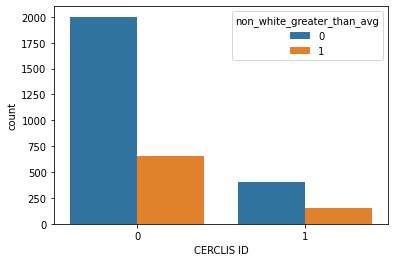

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=full_ds, x="CERCLIS ID", hue="non_white_greater_than_avg")

0.8149759724718867 0.827090337104709


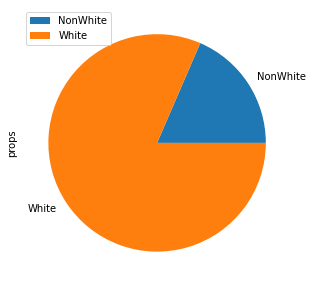

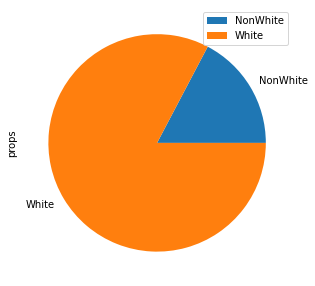

In [ ]:

with_superfund = full_ds[full_ds['CERCLIS ID'] == 1]
without_superfund = full_ds[full_ds['CERCLIS ID'] == 0]

white_with = with_superfund['only_white_prop'].mean()
non_white_with = 1 - white_with

white_without = without_superfund['only_white_prop'].mean()
print(white_with, white_without)
non_white_without = 1 - white_without


df = pd.DataFrame({'props': [non_white_with, white_with]}, index=['NonWhite', 'White'])
plot = df.plot.pie(y='props', figsize=(5, 5))

df_without = pd.DataFrame({'props': [non_white_without, white_without]}, index=['NonWhite', 'White'])
plot_without = df_without.plot.pie(y='props', figsize=(5, 5))

0.6407109146313724 0.5717811624252274


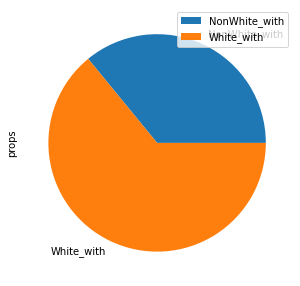

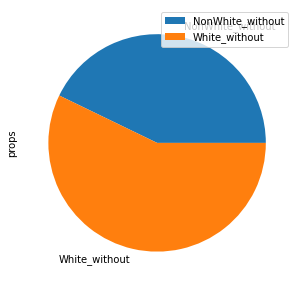

In [ ]:
with_superfund_ = full_ds[full_ds['CERCLIS ID'] == 1]
without_superfund_ = full_ds[full_ds['CERCLIS ID'] == 0]

with_superfund = with_superfund_[with_superfund_['State'] == 'South Carolina']
without_superfund = without_superfund_[without_superfund_['State'] == 'South Carolina']

white_with = with_superfund['only_white_prop'].mean()
non_white_with = 1 - white_with

white_without = without_superfund['only_white_prop'].mean()
print(white_with, white_without)
non_white_without = 1 - white_without


df = pd.DataFrame({'props': [non_white_with, white_with]}, index=['NonWhite_with', 'White_with'])
plot = df.plot.pie(y='props', figsize=(5, 5))

df_without = pd.DataFrame({'props': [non_white_without, white_without]}, index=['NonWhite_without', 'White_without'])
plot_without = df_without.plot.pie(y='props', figsize=(5, 5))

0.09315124547848004 0.0907450031820043


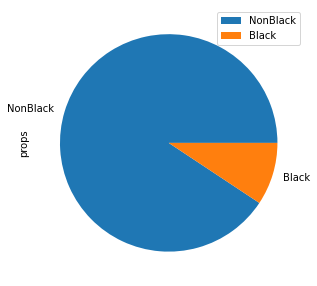

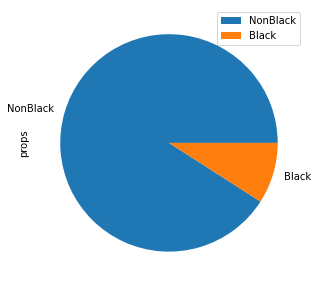

In [ ]:
with_superfund = full_ds[full_ds['CERCLIS ID'] == 1]
without_superfund = full_ds[full_ds['CERCLIS ID'] == 0]

black_with = with_superfund['only_black_prop'].mean()
non_black_with = 1 - black_with

black_without = without_superfund['only_black_prop'].mean()
print(black_with, black_without)
non_black_without = 1 - black_without


df = pd.DataFrame({'props': [non_black_with, black_with]}, index=['NonBlack', 'Black'])
plot = df.plot.pie(y='props', figsize=(5, 5))

df_without = pd.DataFrame({'props': [non_black_without, black_without]}, index=['NonBlack', 'Black'])
plot_without = df_without.plot.pie(y='props', figsize=(5, 5))

# Model Training

#### Split into Training and Test set

In [ ]:
from sklearn.model_selection import train_test_split

# get only columns with feature engineered proportions
X_census = full_ds.iloc[:,21:]
X_census = X_census.drop("CERCLIS ID", axis= 1)

y_census = full_ds["CERCLIS ID"]
X_train, X_test, y_train, y_test = train_test_split(X_census, y_census, test_size=0.33, random_state=42)

X_train.head(5)

,only_white_prop,only_black_prop,no_hs_prop,hs_prop,bach_prop,total_unemployed,white_uncovered_prop,black_uncovered_prop,poverty_prop,non_white_greater_than_avg
68,0.952536,0.014077,0.063717,0.362099,0.238962,0.022580,0.039824,0.013115,0.136737,0
1669,0.974453,0.011378,0.035564,0.277024,0.266729,0.006083,0.038194,0.000000,0.108418,0
3077,0.961595,0.005936,0.062894,0.308944,0.258443,0.010172,0.029827,0.000000,0.070580,0
2873,0.811002,0.133024,0.109394,0.320189,0.229975,0.022966,0.114863,0.156084,0.150109,0
3277,0.944812,0.000000,0.004016,0.369478,0.309237,0.032129,0.088785,NaN,0.093394,0


#### Set up pipeline

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Numerical Pipeline: replace NANs with median if there are any, standardize transformation
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

X_census_train = num_pipeline.fit_transform(X_train)
X_census_test = num_pipeline.fit_transform(X_test)

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix 

# Random Forest 
random_forest_clf = RandomForestClassifier(random_state=42)
random_forest_clf.fit(X_census_train, y_train)

y_pred_rf = random_forest_clf.predict(X_census_train)

# 5 fold cross validation
rf_roc = cross_val_score(random_forest_clf, X_census_train, y_train, scoring="roc_auc", cv = 5)
y_train_pred_cm = cross_val_predict(random_forest_clf, X_census_train, y_train, cv=5)
rf_confusion_matrix = confusion_matrix(y_train, y_train_pred_cm)

In [ ]:
print("ROC: ", rf_roc.mean())
print("Confusion Matrix: ", rf_confusion_matrix)

ROC:  0.7263738722552382
Confusion Matrix:  [[1722   52]
 [ 332   47]]


#### Tune Hyperparameters:

In [ ]:
# Grid Search for Random Forest 

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 5, 10], 'max_features': [2, 4, 6]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_class = RandomForestClassifier()

grid_search_RF = GridSearchCV(forest_class, param_grid, cv = 5, n_jobs = -1, verbose = 2)

grid_search_RF.fit(X_census_train, y_train)
grid_search_RF.best_estimator_
final_model_RF = grid_search_RF.best_estimator_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


In [ ]:
#improvements?

final_predictions_train_rf = final_model_RF.predict(X_census_train)
final_roc_rf = roc_auc_score(y_train, final_predictions_train_rf)
print("Final Model Training ROC SVM: ", final_roc_rf)

rf_confusion_matrix = confusion_matrix(y_train, final_predictions_train_rf)
print(rf_confusion_matrix)

Final Model Training ROC SVM:  1.0
[[1774    0]
 [   0  379]]


#### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

# 5-fold cross-validation
# confusion matrix, ROC AUC

# SVM
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf1.fit(X_census_train, y_train)

svm1_cross_val = cross_val_score(svm_clf1, X_census_train, y_train, cv=5, scoring="roc_auc")
y_train_pred_svm = cross_val_predict(svm_clf1, X_census_train, y_train, cv=5)
svm_confusion_matrix = confusion_matrix(y_train, y_train_pred_svm)

In [ ]:
print("ROC 1: ", svm1_cross_val.mean())
print("Confusion Matrix: ", svm_confusion_matrix)

ROC 1:  0.5417911706935039
Confusion Matrix:  [[1774    0]
 [ 379    0]]


In [ ]:
#Grid Search for SVM

param_grid = [
    {'C': [1, 3, 5], 'kernel': ['linear']},
    {'C': [1, 3, 5], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
    ]

svm_reg = SVC()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5,
                           refit=True,verbose=2)
grid_search.fit(X_census_train, y_train)
final_model_SVM = grid_search.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .................................C=1, kernel=linear; total time=   0.1s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.1s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=3, kernel=linear; total time=   0.1s
[CV] END .................................C=3, kernel=linear; total time=   0.1s
[CV] END .................................C=3, kernel=linear; total time=   0.1s
[CV] END .................................C=3, kernel=linear; total time=   0.1s
[CV] END .................................C=3, kernel=linear; total time=   0.1s
[CV] END .................................C=5, kernel=linear; total time=   0.1s
[CV] END .................................C=5, ke

In [ ]:
#improvements?

final_predictions_train = final_model_SVM.predict(X_census_train)
final_roc_svm = roc_auc_score(y_train, final_predictions_train)
print("Final Model Training ROC SVM: ", final_roc_svm)

svm_confusion_matrix = confusion_matrix(y_train, final_predictions_train)
print(svm_confusion_matrix)

Final Model Training ROC SVM:  0.5
[[1774    0]
 [ 379    0]]


#### Neural Network: MLPClassification

In [ ]:
import tensorflow as tf
from tensorflow import keras

mlp_model = keras.models.Sequential()
mlp_model.add(keras.layers.Dense(50, activation="relu"))
mlp_model.add(keras.layers.Dense(1, activation="sigmoid"))

mlp_model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=[keras.metrics.categorical_accuracy])

In [ ]:
history  = mlp_model.fit(X_census_train, y_train, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
61/61 [==============================] - 1s 11ms/step - loss: 0.5307 - categorical_accuracy: 1.0000 - val_loss: 0.5287 - val_categorical_accuracy: 1.0000
Epoch 2/10
61/61 [==============================] - 0s 6ms/step - loss: 0.4247 - categorical_accuracy: 1.0000 - val_loss: 0.5281 - val_categorical_accuracy: 1.0000
Epoch 3/10
61/61 [==============================] - 0s 6ms/step - loss: 0.4074 - categorical_accuracy: 1.0000 - val_loss: 0.5330 - val_categorical_accuracy: 1.0000
Epoch 4/10
61/61 [==============================] - 0s 7ms/step - loss: 0.4022 - categorical_accuracy: 1.0000 - val_loss: 0.5301 - val_categorical_accuracy: 1.0000
Epoch 5/10
61/61 [==============================] - 0s 6ms/step - loss: 0.3992 - categorical_accuracy: 1.0000 - val_loss: 0.5294 - val_categorical_accuracy: 1.0000
Epoch 6/10
61/61 [==============================] - 0s 7ms/step - loss: 0.3963 - categorical_accuracy: 1.0000 - val_loss: 0.5282 - val_categorical_accuracy: 1.0000
Epoch 7/10
61/6

# Model Evaluation

#### Random Forest

In [ ]:
# Random Forest
final_predictions_RF = final_model_RF.predict(X_census_test)

final_roc_RF = roc_auc_score(y_test, final_predictions_RF)
print("Final ROC RF: ", final_roc_RF)

RF_confusion_matrix = confusion_matrix(y_test, final_predictions_RF)
print(RF_confusion_matrix)

Final ROC RF:  0.5396485004837149
[[855  31]
 [155  20]]


In [ ]:
# Simple Random Forest
final_predictions_RF2 = random_forest_clf.predict(X_census_test)

final_roc_RF2 = roc_auc_score(y_test, final_predictions_RF2)
print("Final ROC RF: ", final_roc_RF2)

RF_confusion_matrix2 = confusion_matrix(y_test, final_predictions_RF2)
print(RF_confusion_matrix2)

Final ROC RF:  0.5464559819413093
[[862  24]
 [154  21]]


#### SVM

In [ ]:
final_model_svm = grid_search.best_estimator_
final_predictions = final_model_svm.predict(X_census_test)

final_roc_svm = roc_auc_score(y_test, final_predictions)
print("Final ROC SVM: ", final_roc_svm)

svm_confusion_matrix = confusion_matrix(y_test, final_predictions)
print(svm_confusion_matrix)

Final ROC SVM:  0.5
[[886   0]
 [175   0]]


#### MLP

In [ ]:
score = mlp_model.evaluate(X_census_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

34/34 [==============================] - 0s 2ms/step - loss: 0.3989 - categorical_accuracy: 1.0000
Test loss: 0.3989245295524597
Test accuracy: 1.0
